In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
from collections import Counter

# -----------------------------
# 1) Load XML
# -----------------------------
xml_path = "DenkmallisteHamburg.xml"   # change if your file name/path differs
tree = ET.parse(xml_path)
root = tree.getroot()

print("Root tag:", root.tag)

# -----------------------------
# 2) Find the most common child tag (likely the repeating "record" element)
# -----------------------------
tags = [elem.tag for elem in root.iter()]
tag_counts = Counter(tags)

print("\nTop 15 tags in this XML:")
for t, c in tag_counts.most_common(15):
    print(f"{t}: {c}")

# Pick the most frequent non-root tag as the "record" tag
root_tag = root.tag
candidate_tags = [(t, c) for t, c in tag_counts.items() if t != root_tag]
record_tag, record_count = max(candidate_tags, key=lambda x: x[1])

print(f"\nGuessed record tag: '{record_tag}' (appears {record_count} times)")

# -----------------------------
# 3) Extract records into rows
#    We will store only leaf text fields from each record element.
# -----------------------------
rows = []
records = root.findall(f".//{record_tag}")

print("Records found:", len(records))

for rec in records:
    row = {}
    # collect leaf nodes under this record
    for child in rec.iter():
        # leaf node = no children
        if len(list(child)) == 0:
            key = child.tag
            val = child.text.strip() if child.text else None
            # avoid overwriting duplicates: keep first, or rename duplicates
            if key in row:
                i = 2
                new_key = f"{key}_{i}"
                while new_key in row:
                    i += 1
                    new_key = f"{key}_{i}"
                row[new_key] = val
            else:
                row[key] = val
    rows.append(row)

df = pd.DataFrame(rows)

print("\nDataFrame shape:", df.shape)
display(df.head(10))

Root tag: DenkmallisteHamburg

Top 15 tags in this XML:
Denkmal: 22571
ID: 22571
Belegenheit: 22571
Art: 22571
Stadtteil: 22570
Bezirk: 22570
Adressen: 22565
XCenter_EPSG25832: 22541
YCenter_EPSG25832: 22541
Typ: 22005
Datierung: 21747
Ensembles: 19459
Entwurf: 16547
Bezeichnung: 9754
DLNummer_Alt: 6427

Guessed record tag: 'Denkmal' (appears 22571 times)
Records found: 22571

DataFrame shape: (22571, 14)


,ID,Belegenheit,Adressen,Stadtteil,Bezirk,Typ,Entwurf,Datierung,Bezeichnung,Ensembles,DLNummer_Alt,Art,XCenter_EPSG25832,YCenter_EPSG25832
0,11752,Lutterothstraße 98,Lutterothstraße 98,Eimsbüttel,Eimsbüttel,Pastorat,"Distel & Grubitz ( Distel, Hermann/ Grubitz, A...",1912,Pastorat der ehem. Stephanuskirche,"Eidelstedter Weg 91/ 105, Lutterothstraße 76, ...",1738,Objekt,562489.24250,5937414.72350
1,11753,Kaistraße o.Nr.,"Kaistraße o.Nr., Max-Brauer-Allee o.Nr., Palma...","Altona-Altstadt, Altona-Nord",Altona,Tunnel,NaN,1874; 1893 (Verlängerung),"Hafenbahn Altona, Hafenbahntunnel (""Schellfisc...","Hafenbahn Altona, Ensemble aus Relikten der Ha...",NaN,Objekt,561915.26750,5933739.89300
2,11753,Max-Brauer-Allee o.Nr.,"Kaistraße o.Nr., Max-Brauer-Allee o.Nr., Palma...","Altona-Altstadt, Altona-Nord",Altona,Tunnel,NaN,1874; 1893 (Verlängerung),"Hafenbahn Altona, Hafenbahntunnel (""Schellfisc...","Hafenbahn Altona, Ensemble aus Relikten der Ha...",NaN,Objekt,561915.26750,5933739.89300
3,11753,Palmaille o.Nr.,"Kaistraße o.Nr., Max-Brauer-Allee o.Nr., Palma...","Altona-Altstadt, Altona-Nord",Altona,Tunnel,NaN,1874; 1893 (Verlängerung),"Hafenbahn Altona, Hafenbahntunnel (""Schellfisc...","Hafenbahn Altona, Ensemble aus Relikten der Ha...",NaN,Objekt,561915.26750,5933739.89300
4,11753,Paul-Nevermann-Platz o.Nr.,"Kaistraße o.Nr., Max-Brauer-Allee o.Nr., Palma...","Altona-Altstadt, Altona-Nord",Altona,Tunnel,NaN,1874; 1893 (Verlängerung),"Hafenbahn Altona, Hafenbahntunnel (""Schellfisc...","Hafenbahn Altona, Ensemble aus Relikten der Ha...",NaN,Objekt,561915.26750,5933739.89300
5,11753,Präsident-Krahn-Straße o.Nr.,"Kaistraße o.Nr., Max-Brauer-Allee o.Nr., Palma...","Altona-Altstadt, Altona-Nord",Altona,Tunnel,NaN,1874; 1893 (Verlängerung),"Hafenbahn Altona, Hafenbahntunnel (""Schellfisc...","Hafenbahn Altona, Ensemble aus Relikten der Ha...",NaN,Objekt,561915.26750,5933739.89300
6,11758,Kielkoppelstraße 51,Kielkoppelstraße 51,Rahlstedt,Wandsbek,Gemeindehaus,"Grundmann, Friedhelm Professor",1968 / 1969,Gemeindehaus Dankeskirche,"Kielkoppelstraße 51, 53",NaN,Objekt,578101.57800,5938477.91600
7,11759,Zum Gutspark 2,Zum Gutspark 2,Farmsen-Berne,Wandsbek,Wohnen,"Ranck, Johann Christoph Otto",1926,Zum Gutspark 2 (Wohnhaus),"Zum Gutspark 2, Wohnhaus mit Garten",NaN,Objekt,575103.18800,5942504.63000
8,11760,Falkensteiner Ufer 42,Falkensteiner Ufer 42,Blankenese,Altona,Wohnen,"Hawksley, Thomas/ Lindley, William",1859,Pumpwerk am Falkensteiner Ufer (Beamtenwohnhaus),Ensemble Wasserwerk Altona mit dem Grundwasser...,NaN,Objekt,551866.35850,5935037.04150
9,11761,"Falkensteiner Ufer o.Nr., gegenüber von Nr. 42","Falkensteiner Ufer o.Nr., gegenüber von Nr. 42",Blankenese,Altona,Filterbecken,NaN,1898; 2010 / 2011 (Renaturierung),Pumpwerk am Falkensteiner Ufer (Rückhaltebecken),Ensemble Wasserwerk Altona mit dem Grundwasser...,NaN,Objekt,551712.89700,5935023.68750


In [2]:
df.columns

Index(['ID', 'Belegenheit', 'Adressen', 'Stadtteil', 'Bezirk', 'Typ',
       'Entwurf', 'Datierung', 'Bezeichnung', 'Ensembles', 'DLNummer_Alt',
       'Art', 'XCenter_EPSG25832', 'YCenter_EPSG25832'],
      dtype='object')

In [3]:
#convert the dataframe to location dataframe consisting only x and y coordinates

loc_df = df[['XCenter_EPSG25832', 'YCenter_EPSG25832']].dropna()

# make sure they are numeric
loc_df = loc_df.astype(float)

loc_df.head()

,XCenter_EPSG25832,YCenter_EPSG25832
0,562489.2425,5.937415e+06
1,561915.2675,5.933740e+06
2,561915.2675,5.933740e+06
3,561915.2675,5.933740e+06
4,561915.2675,5.933740e+06


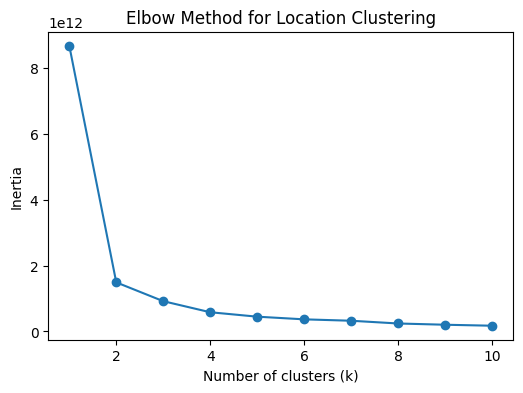

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(loc_df)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Location Clustering")
plt.show()

In [5]:
k = 4  # example
kmeans = KMeans(n_clusters=k, random_state=42)
loc_df['cluster'] = kmeans.fit_predict(loc_df)

loc_df.head()

,XCenter_EPSG25832,YCenter_EPSG25832,cluster
0,562489.2425,5.937415e+06,0
1,561915.2675,5.933740e+06,0
2,561915.2675,5.933740e+06,0
3,561915.2675,5.933740e+06,0
4,561915.2675,5.933740e+06,0


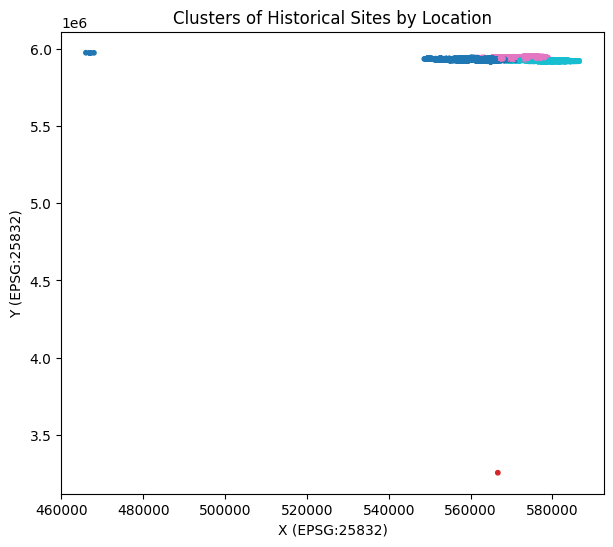

In [6]:
plt.figure(figsize=(7,6))
plt.scatter(
    loc_df['XCenter_EPSG25832'],
    loc_df['YCenter_EPSG25832'],
    c=loc_df['cluster'],
    cmap='tab10',
    s=10
)
plt.xlabel("X (EPSG:25832)")
plt.ylabel("Y (EPSG:25832)")
plt.title("Clusters of Historical Sites by Location")
plt.show()

In [7]:
import pandas as pd
from pyproj import Transformer

# df is your dataframe
# Make sure columns are numeric
df["XCenter_EPSG25832"] = pd.to_numeric(df["XCenter_EPSG25832"], errors="coerce")
df["YCenter_EPSG25832"] = pd.to_numeric(df["YCenter_EPSG25832"], errors="coerce")

# Drop rows with missing coords
df_loc = df.dropna(subset=["XCenter_EPSG25832", "YCenter_EPSG25832"]).copy()

# Convert EPSG:25832 -> EPSG:4326 (lon/lat)
transformer = Transformer.from_crs("EPSG:25832", "EPSG:4326", always_xy=True)
lon, lat = transformer.transform(
    df_loc["XCenter_EPSG25832"].values,
    df_loc["YCenter_EPSG25832"].values
)

df_loc["Longitude"] = lon
df_loc["Latitude"] = lat

In [10]:
%pip install pyproj

     |████████████████████████████████| 4.9 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 152 kB 24.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/umar/Documents/Data Mining/market-basket-analysis/Code/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


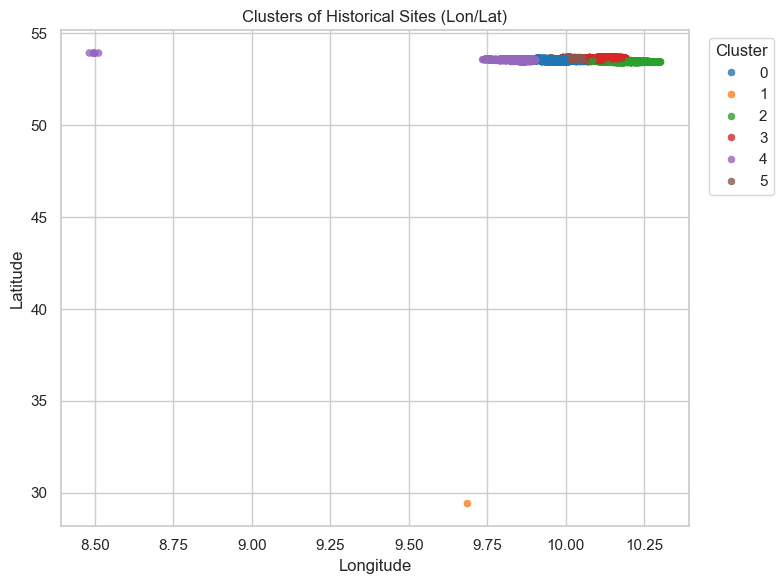

In [8]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# choose k from your elbow method
k = 6

km = KMeans(n_clusters=k, random_state=42, n_init=10)
df_loc["Cluster"] = km.fit_predict(df_loc[["Longitude", "Latitude"]])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_loc,
    x="Longitude",
    y="Latitude",
    hue="Cluster",
    palette="tab10",
    s=25,
    alpha=0.8,
    edgecolor=None
)
plt.title("Clusters of Historical Sites (Lon/Lat)")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

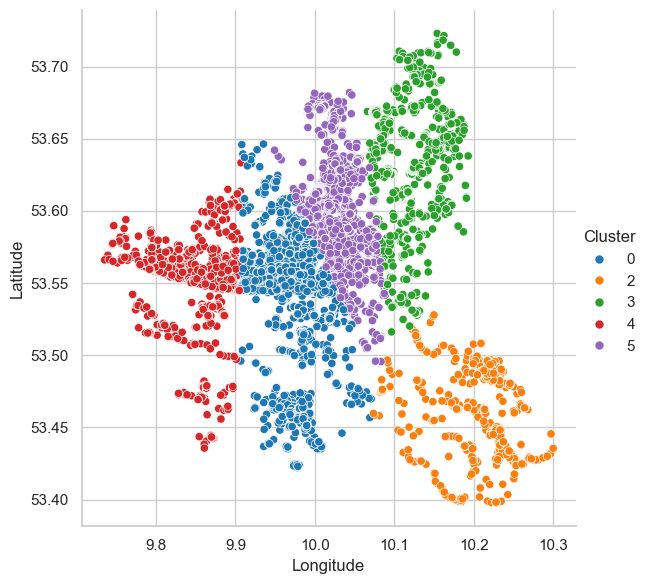

In [15]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", palette="tab10", data=df_loc, height=6,
);
